<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/Secci%C3%B3n_2_Arbol_de_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

sns.set(style="whitegrid")

In [3]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

In [4]:
data = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/SECCION_1.csv')
data.head()

,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,RENTABILIDAD
0,800,15450,0,0
1,800,14740,0,0
2,800,15035,0,0
3,800,15240,0,0
4,800,16054,0,1


In [5]:
feature_names = data.columns[:3].tolist()
feature_names

['taxi_fuel_kg_qty', 'trip_fuel_kg_qty', 'extra_fuel_kg_qty']

In [6]:
data['TIPO_RENTAB'] = data['RENTABILIDAD'].map({
        0: 'alta',
        1: 'media',
        2: 'baja'
    })

data.head()

,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,RENTABILIDAD,TIPO_RENTAB
0,800,15450,0,0,alta
1,800,14740,0,0,alta
2,800,15035,0,0,alta
3,800,15240,0,0,alta
4,800,16054,0,1,media


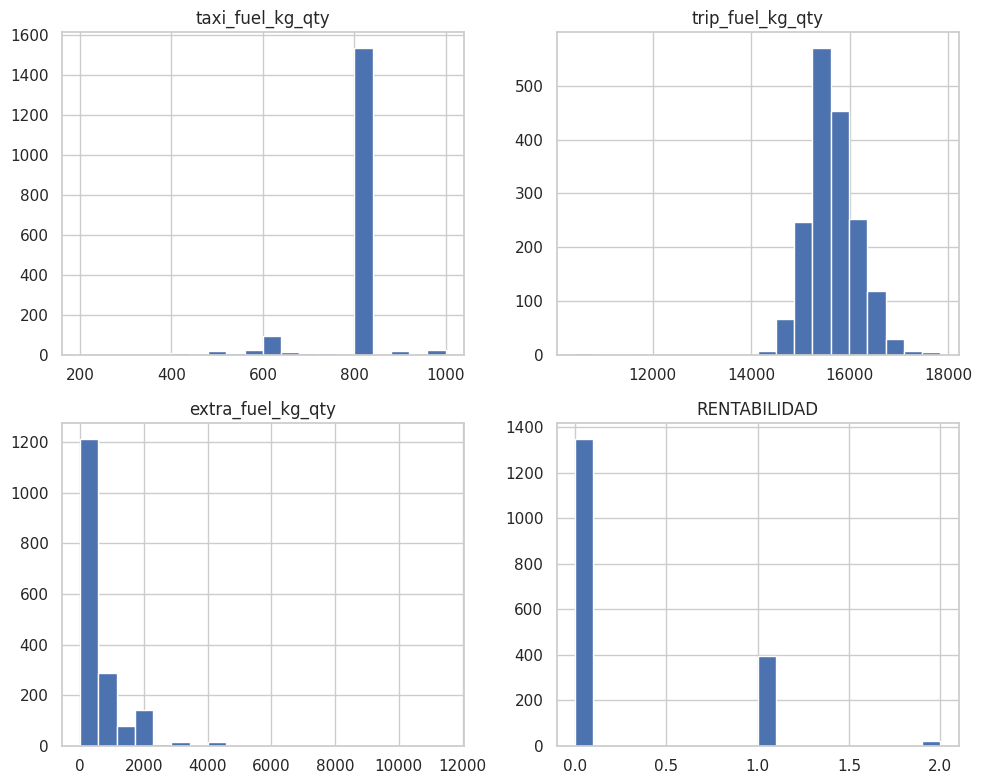

In [7]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [8]:
    X = data[feature_names]
    y = data['RENTABILIDAD']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras.")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras.")

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
    print(f"\nPrecisión del árbol de decisión en el conjunto de prueba: {accuracy:.4f}")



Tamaño del conjunto de entrenamiento: 1235 muestras.
Tamaño del conjunto de prueba: 530 muestras.

Precisión del árbol de decisión en el conjunto de prueba: 1.0000


In [9]:
    reglas_texto = export_text(clf, feature_names=feature_names, show_weights=True)
    print("\nReglas del árbol de decisión:")
    print(reglas_texto)


Reglas del árbol de decisión:
|--- trip_fuel_kg_qty <= 15999.50
|   |--- extra_fuel_kg_qty <= 3710.00
|   |   |--- weights: [944.00, 0.00, 0.00] class: 0
|   |--- extra_fuel_kg_qty >  3710.00
|   |   |--- weights: [0.00, 0.00, 9.00] class: 2
|--- trip_fuel_kg_qty >  15999.50
|   |--- extra_fuel_kg_qty <= 3250.00
|   |   |--- weights: [0.00, 276.00, 0.00] class: 1
|   |--- extra_fuel_kg_qty >  3250.00
|   |   |--- weights: [0.00, 0.00, 6.00] class: 2




Visualizando el árbol de decisión...


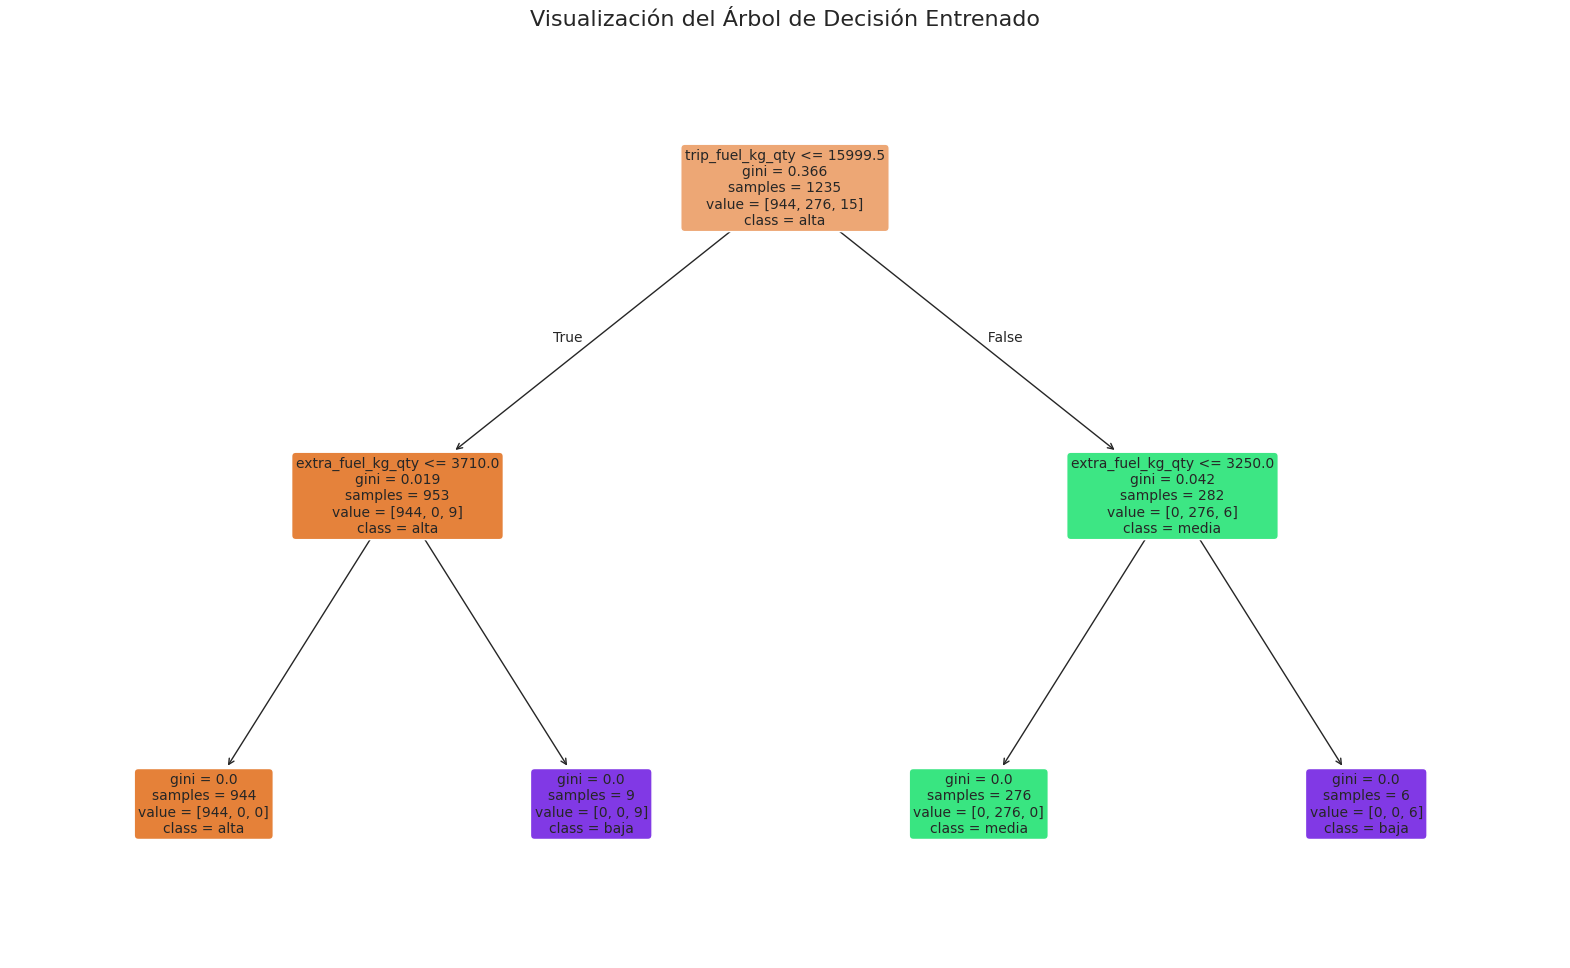

In [10]:
    print("\nVisualizando el árbol de decisión...")
    plt.figure(figsize=(20, 12))
    # Define the string names for the classes
    class_names_list = ['alta', 'media', 'baja']
    plot_tree(
        clf,
        feature_names=feature_names,
        # Use the list of string class names instead of the numerical column
        class_names=class_names_list,
        filled=True,
        rounded=True,
        fontsize=10 # Ajustar tamaño de fuente si es necesario
)
    plt.title("Visualización del Árbol de Decisión Entrenado", fontsize=16)
    plt.show()

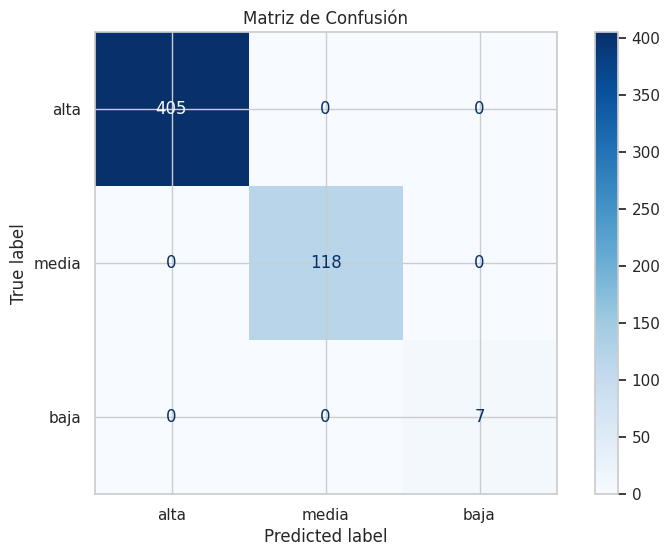

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_list)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

In [12]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nF1-Score (ponderado) en el conjunto de prueba: {f1:.4f}")


F1-Score (ponderado) en el conjunto de prueba: 1.0000
